Project: Marketing campaign by Bank to sell the Term Deposit product for potential clients
    
Description:
     The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns 
were based on phone Calls. Often, more than one contact to the same client was required,in order to access if the product 
(bank term deposit) would be ('yes') or not ('no') subscribed.

Attributes:
    1. Age: Age of the customer
    2. Job : type of job of the customer
    3. Marital : Marital status of the customer
    4. Education: Educational Qualification of the customer
    5. Default: has credit in default?
    6. Balance: average yearly balance, in euros 
    7. Housing: has housing loan or not?
    8. Loan: has personal loan or not?
    9. Contact: contact communication type
    10. Day: last contact day of the month
    11. Month: last contact month of year
    12. Duration: last contact duration, in seconds
    13. Campaign: number of contacts performed during this
    campaign and for this client
    14. Pdays: number of days that passed by after the client was
    last contacted from a previous campaign
    15. Previous: number of contacts performed before this
    campaign and for this client
    16. Poutcome: outcome of the previous marketing campaign
    17. Target: has the client subscribed to term deposit? 

In [492]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [493]:
from plotly.offline import iplot
from plotly import tools
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [494]:
import warnings

In [495]:
#import dataset
DB=pd.read_csv("bank-full.csv")

In [496]:
df=DB.copy()

In [497]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [498]:
df.shape

(45211, 17)

dataset has 45211 rows and 17 coloumns

In [314]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

No mising  values in dataset

In [315]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


the above is a five point summary of numerical attributes (age,balance,day,duration,campaign,pdays,previous)

# Plots

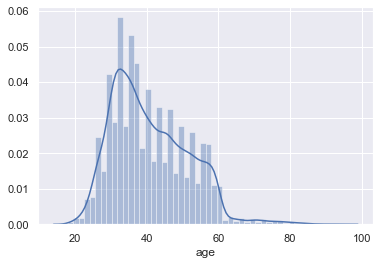

In [316]:
#distplots
sns.distplot(df['age'])

Max age of customers contacted is between 20  and 40

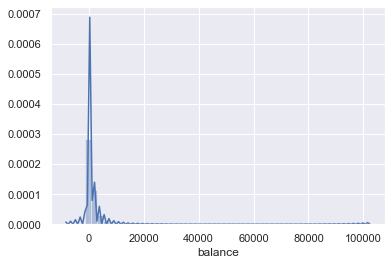

In [91]:
sns.distplot(df['balance'])

yearly balance of customers is range of few thousand units

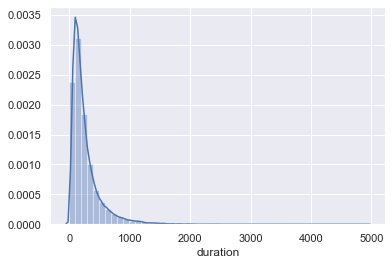

In [92]:
sns.distplot(df['duration'])

the amount of time spent on customers is below 1000 seconds and peak is in range of few hundred seconds 

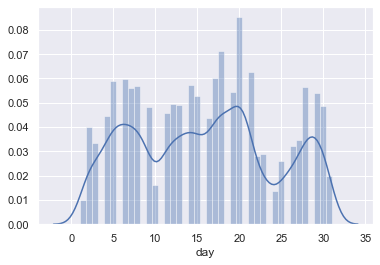

In [93]:
sns.distplot(df['day'])

the day of contact made is maximum between 15 and 20th day of the month

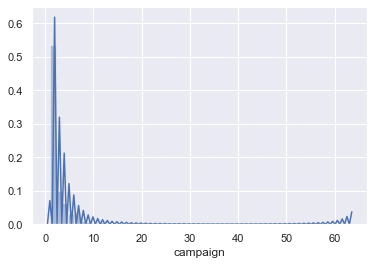

In [94]:
sns.distplot(df['campaign'])

Number of contacts performed for a customer during present campaign is in the range 0 to 10

In [95]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [96]:
#Boxplots

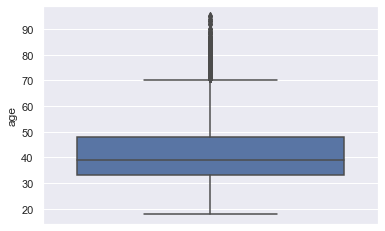

In [97]:
sns.boxplot(df['age'],orient='v')

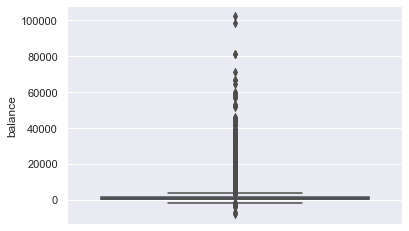

In [98]:
sns.boxplot(df['balance'],orient='v')

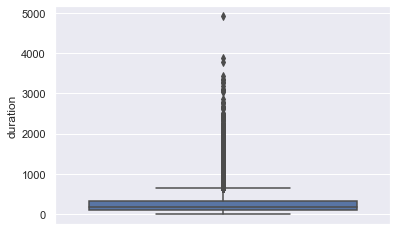

In [99]:
sns.boxplot(df['duration'],orient='v')

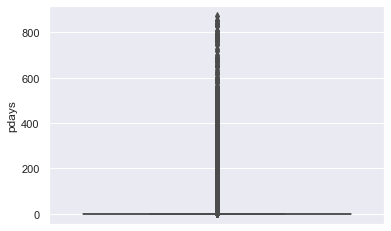

In [100]:
sns.boxplot(df['pdays'],orient='v')

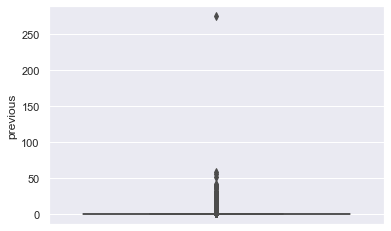

In [101]:
sns.boxplot(df['previous'],orient='v')

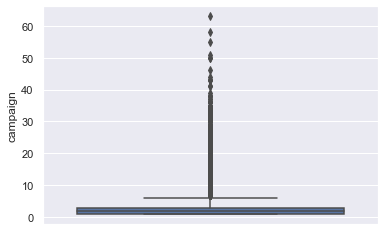

In [102]:
sns.boxplot(df['campaign'],orient='v')

Analysis:
    
median age of customers contacted is around 40 and outliers above 70

median yearly balance is around few 1000 euros

median duration is in few hundred seconds and few outliers around 1000 seconds

number of contacts made during this campaign for a customer is below 10.

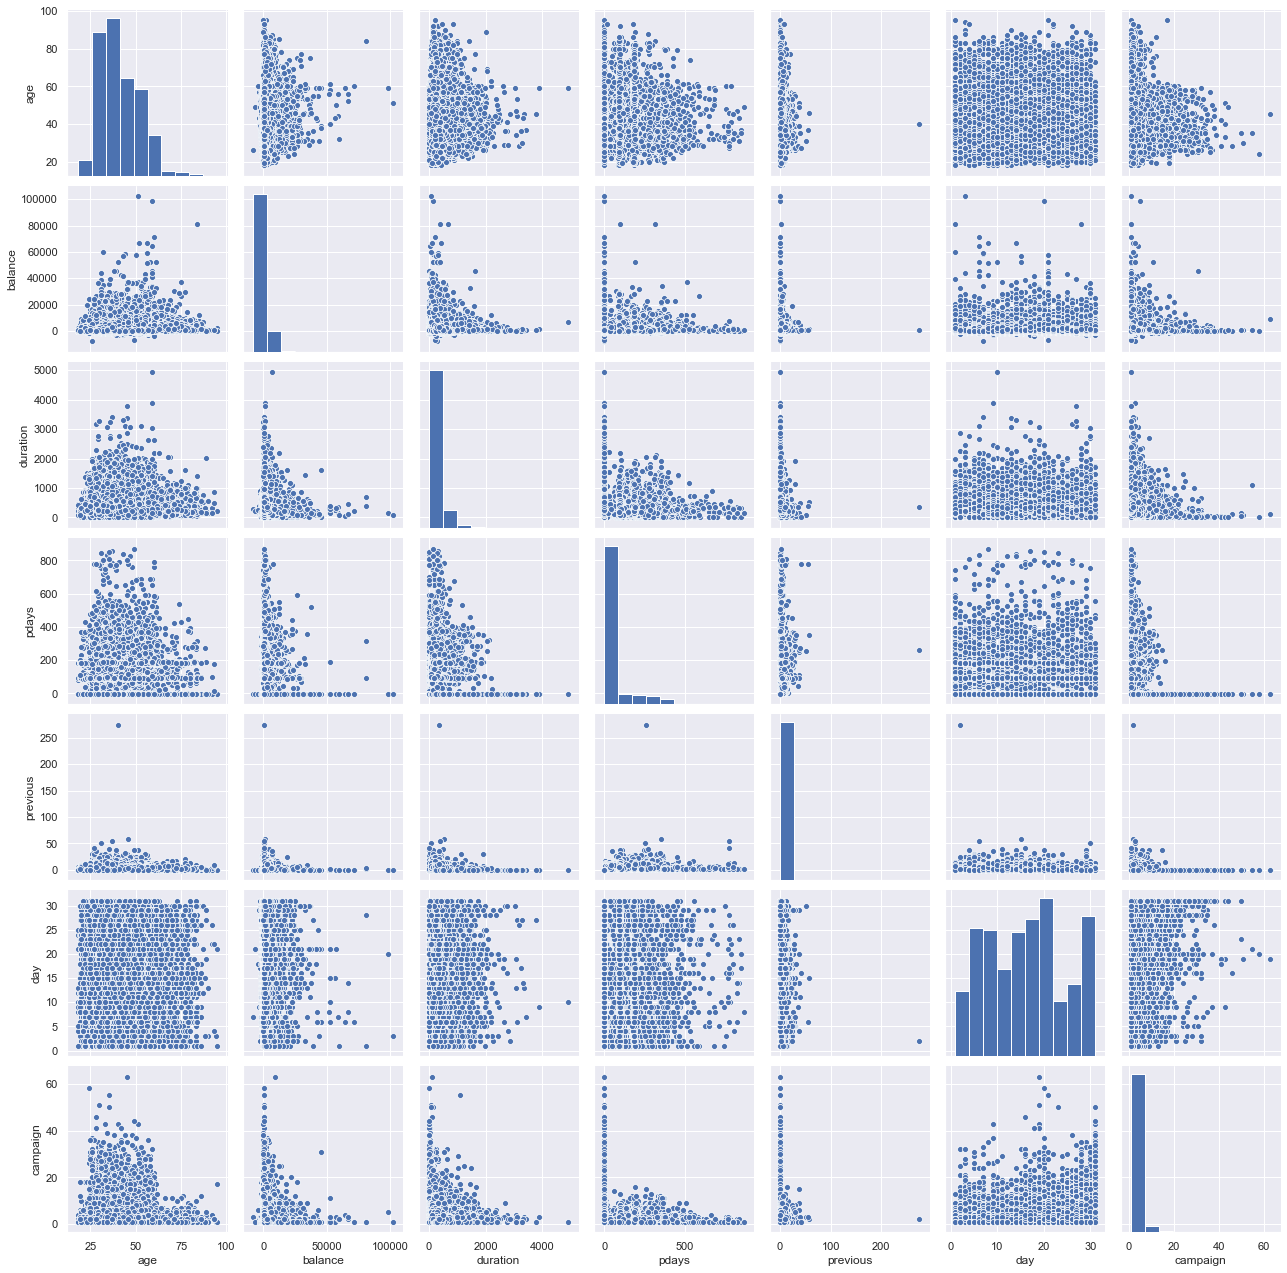

In [103]:
sns.pairplot(df[['age','balance','duration','pdays','previous','day','campaign']])

pair plot analysis

1.Age attribute has right skewed data and spread across age groups 20 and 60

2.Balance attribute has data which indicates yearly balance below 20000 euros

3.day attribute has data which indicates customers are contacted maximum on 20th day of the month

4.Number of days that passed by ( pdays ) after a client is last contacted from previous campaign is between 0 and 200

Count Plots

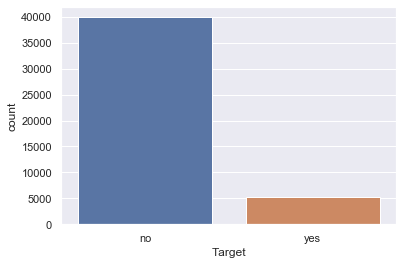

In [104]:
sns.countplot("Target",data=df)

No of values with no entries are more than yes in Target coloumns

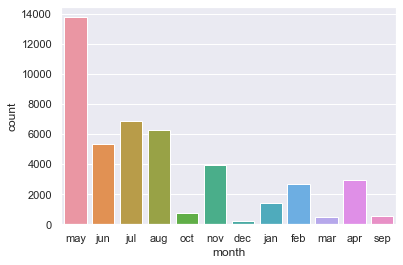

In [105]:
sns.countplot('month',data=df)

No of contacts made to customer is more in month of MAY, JULY, AUG

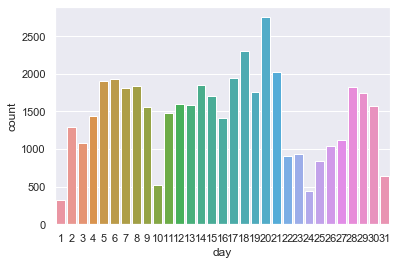

In [106]:
sns.countplot('day',data=df)

No of contacts made to customer is more on 20th day of month

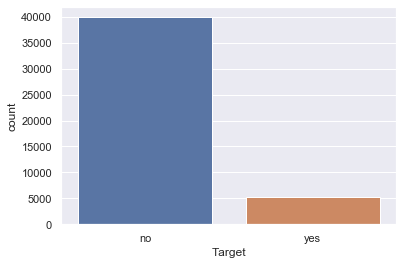

In [107]:
sns.countplot('Target',data=df)

The output dependent variable Target is categorical with yes entries around 5289 and no entries 39922

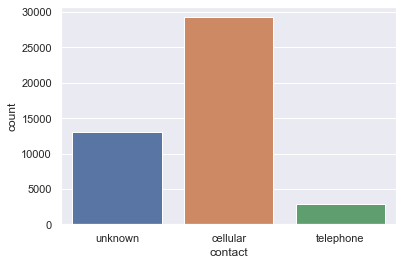

In [108]:
sns.countplot('contact',data=df)

there are 13020 unknown values under contact attribute

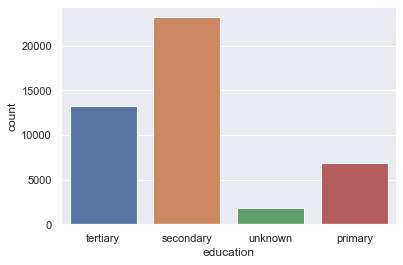

In [109]:
sns.countplot('education',data=df)

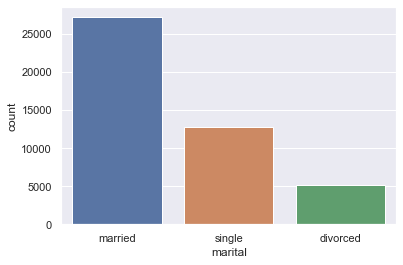

In [110]:
sns.countplot('marital',data=df)

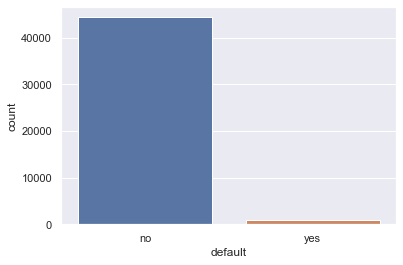

In [111]:
sns.countplot('default',data=df)

815 people has credit by default

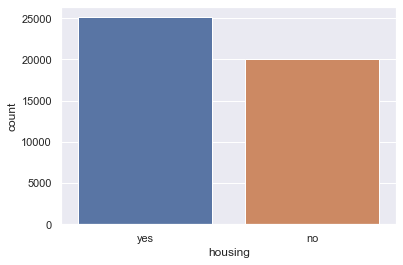

In [112]:
sns.countplot('housing',data=df)

25130 people have already loan on house

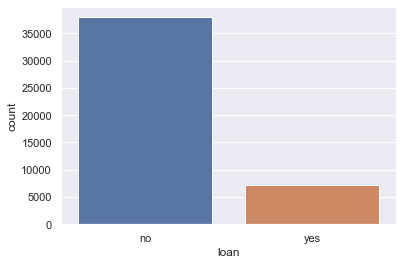

In [113]:
sns.countplot('loan',data=df)

7244 people has personal loan

In [114]:
fig = ff.create_facet_grid(
    df,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

Text(0.5, 1.0, 'Median Balance by Education')

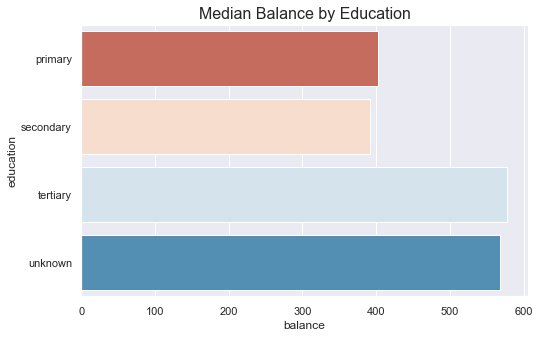

In [115]:
education_groups = df.groupby(['education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(8,5))
sns.barplot(x="balance", y="education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Education', fontsize=16)

Text(0.5, 1.0, 'balance vs Target')

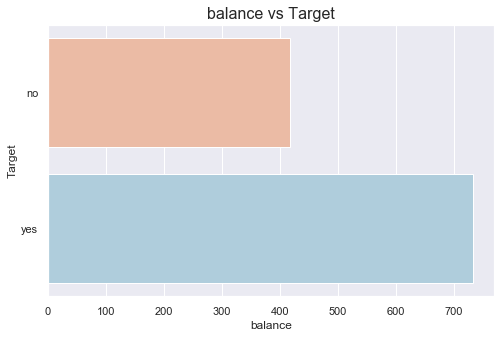

In [116]:
balancebytarget = df.groupby(['Target'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(8,5))
sns.barplot(x="balance", y="Target", data=balancebytarget,
            label="Total", palette="RdBu")
plt.title('balance vs Target', fontsize=16)

->duration has a high correlation with
term deposits meaning the higher the duration
the more likely it is for a client to open a term deposit.
hence it can be dropped.
duration is obtained after the call is made to the potential client 
so if the target client has never received calls this feature is not that useful

->marital status as single have high balance hence more chances of opening term deposits

->marital status as divorced have less balance and less chances of opening term deposits

->marital and education column can also be  deleted

In [499]:
df.drop(['job','marital','education'],axis=1,inplace=True)

In [500]:
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


DATATYPES

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   default   45211 non-null  object
 2   balance   45211 non-null  int64 
 3   housing   45211 non-null  object
 4   loan      45211 non-null  object
 5   contact   45211 non-null  object
 6   day       45211 non-null  int64 
 7   month     45211 non-null  object
 8   duration  45211 non-null  int64 
 9   campaign  45211 non-null  int64 
 10  pdays     45211 non-null  int64 
 11  previous  45211 non-null  int64 
 12  poutcome  45211 non-null  object
 13  Target    45211 non-null  object
dtypes: int64(7), object(7)
memory usage: 4.8+ MB


In [503]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['Target'] = le.fit_transform(df['Target'])

In [504]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'Target'],
      dtype='object')

In [505]:
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,0,1,0,0,2,5,8,198,1,-1,0,3,0


In Target coloumn

No entry is encoded as 0 

Yes entry is encoded as 1


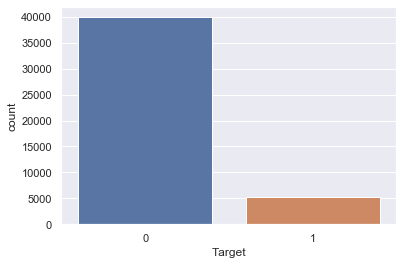

In [506]:
sns.countplot('Target',data=df)

All Attributes are numerical 

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   default   45211 non-null  int32
 2   balance   45211 non-null  int64
 3   housing   45211 non-null  int32
 4   loan      45211 non-null  int32
 5   contact   45211 non-null  int32
 6   day       45211 non-null  int64
 7   month     45211 non-null  int32
 8   duration  45211 non-null  int64
 9   campaign  45211 non-null  int64
 10  pdays     45211 non-null  int64
 11  previous  45211 non-null  int64
 12  poutcome  45211 non-null  int32
 13  Target    45211 non-null  int32
dtypes: int32(7), int64(7)
memory usage: 3.6 MB


In [508]:
Y=df['Target']
X=df.drop('Target',axis=1)

TRAIN TEST SPLIT

In [509]:
#import libraries
from sklearn.model_selection import train_test_split

In [449]:
#startitfy parameter is given to target attribute as splitting may
#unevenly split the least majority class and our validation may favour majority class

In [510]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.25,stratify=df['Target'])

In [511]:
print('X_train :',len(X_train))
print('X_test :', len(X_test))
print('y_train :',len(y_train ))
print('y_test :', len(y_test))

X_train : 33908
X_test : 11303
y_train : 33908
y_test : 11303


In [512]:
from sklearn.preprocessing  import StandardScaler

In [513]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

# Models

In [514]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import recall_score

In [515]:
from sklearn.metrics import classification_report

DECISION TREE

In [516]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
DTmodel=DecisionTreeClassifier(criterion='entropy',random_state=1)

In [517]:
DTmodel.fit(X_train_sd,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [518]:
ypredict=DTmodel.predict(X_test_sd)

In [519]:
print('Decision tree train score:',DTmodel.score(X_train_sd,y_train))
print('Decision tree test score:',DTmodel.score(X_test_sd,y_test))
print('Accuracy:',accuracy_score(y_test, ypredict))

Decision tree train score: 1.0
Decision tree test score: 0.8771122710784748
Accuracy: 0.8771122710784748


In [520]:
print(metrics.confusion_matrix(y_test,ypredict))

[[9302  679]
 [ 710  612]]


In [521]:
print(classification_report(y_test,ypredict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9981
           1       0.47      0.46      0.47      1322

    accuracy                           0.88     11303
   macro avg       0.70      0.70      0.70     11303
weighted avg       0.88      0.88      0.88     11303



RANDOM FOREST

In [522]:
from sklearn.ensemble import RandomForestClassifier

In [523]:
rfcl = RandomForestClassifier(oob_score=True,random_state=1)
rfcl = rfcl.fit(X_train_sd, y_train)
ypred = rfcl.predict(X_test_sd)

In [524]:
print('Random forest train score:',rfcl.score(X_train_sd,y_train))
print('Random forest test score:',rfcl.score(X_test_sd,y_test))
print('Accuracy:',accuracy_score(y_test,ypred))

Random forest train score: 1.0
Random forest test score: 0.9042732018048306
Accuracy: 0.9042732018048306


In [525]:
print(metrics.confusion_matrix(y_test,ypred))

[[9662  319]
 [ 763  559]]


In [526]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9981
           1       0.64      0.42      0.51      1322

    accuracy                           0.90     11303
   macro avg       0.78      0.70      0.73     11303
weighted avg       0.89      0.90      0.90     11303



Bagging

In [527]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import BaggingClassifier

In [528]:
bgcl = BaggingClassifier(base_estimator=DTmodel,n_estimators=100,random_state=1)
bgcl = bgcl.fit(X_train_sd, y_train)

In [529]:
pred_BG=bgcl.predict(X_test_sd)

In [530]:
print('Bagging_trainscore:',bgcl.score(X_train_sd, y_train))
print('Bagging_testscore:',bgcl.score(X_test_sd,y_test))
print('Accuracy:',accuracy_score(y_test,pred_BG))
print('Recall:',recall_score(y_test,pred_BG))

Bagging_trainscore: 1.0
Bagging_testscore: 0.9020613996284172
Accuracy: 0.9020613996284172
Recall: 0.46747352496217853


In [531]:
print(metrics.confusion_matrix(y_test,pred_BG))

[[9578  403]
 [ 704  618]]


In [532]:
print(classification_report(y_test,pred_BG))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9981
           1       0.61      0.47      0.53      1322

    accuracy                           0.90     11303
   macro avg       0.77      0.71      0.74     11303
weighted avg       0.89      0.90      0.90     11303



BOOSTING

ADABOOSTING

In [533]:
from sklearn.ensemble import AdaBoostClassifier

ADA BOOSTING When base estimator as Decision tree

In [534]:
ABCL=AdaBoostClassifier(base_estimator=DTmodel)

In [535]:
ABCL = ABCL.fit(X_train_sd, y_train)

In [536]:
ABpredict = ABCL.predict(X_test_sd)
print('Ada boost train score:',ABCL.score(X_train_sd, y_train))
print('Ada boost test score:',ABCL.score(X_test_sd,y_test))
print('Accuracy:',accuracy_score(y_test,ABpredict))

Ada boost train score: 1.0
Ada boost test score: 0.8756082455985137
Accuracy: 0.8756082455985137


In [537]:
print(metrics.confusion_matrix(y_test,ABpredict))

[[9286  695]
 [ 711  611]]


In [538]:
print(classification_report(y_test,ABpredict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9981
           1       0.47      0.46      0.46      1322

    accuracy                           0.88     11303
   macro avg       0.70      0.70      0.70     11303
weighted avg       0.87      0.88      0.88     11303



GRADIENT BOOSTING

In [539]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train_sd, y_train)

In [540]:
GBpredict = gbcl.predict(X_test_sd)
print('Gradient boost train score:',gbcl.score(X_train_sd, y_train))
print('Gradient boost test score:',gbcl.score(X_test_sd,y_test))
print('Accuracy:',accuracy_score(y_test,GBpredict))

Gradient boost train score: 0.9099032676654477
Gradient boost test score: 0.9027691763248695
Accuracy: 0.9027691763248695


In [541]:
print(metrics.confusion_matrix(y_test,GBpredict))

[[9699  282]
 [ 817  505]]


In [542]:
print(classification_report(y_test,GBpredict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9981
           1       0.64      0.38      0.48      1322

    accuracy                           0.90     11303
   macro avg       0.78      0.68      0.71     11303
weighted avg       0.89      0.90      0.89     11303



MODEL PERFORMANCE

-> MODELS which are analysed in the project are 
    
    ->Decision tree 
    ->Random Forest Classifier
    ->Bagging
    ->Boosting: in Boosting ADA BOOSTING and GRADIENT BOOSTING techniques are analysed.

-> In the analysis score, Accuracy, Recall, Confusion Matrix,classification report  are calculated

-> Gradient boosting model performed better with good accuracy of 90% with no overfitting although recall score is quite
less when compared to other models.

Inference on the product term deposit 

-> customers balance has direct influence on subscription of term deposit.

-> duration also has direct influence on term deposit,
higher the duration customer talks to bank executives higher is the probability of customer subscribing to term deposit